In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('./data/ss.csv', encoding='EUC-KR')
df.head()

,Player,Pos,RNG,RAA,WAA,OPS,wRC,WAR
0,심우준,AA,0.63,3.55,0.345,0.729,88.4,1.09
1,오지환,AA,7.69,11.09,1.088,0.684,89.0,1.08
2,김지찬,AA,-1.13,-0.32,-0.031,0.628,60.2,0.22
3,박성한,AA,-3.90,-2.72,-0.262,0.709,89.5,0.94
4,김혜성,AA,2.29,4.66,0.449,0.730,99.6,2.56


Text(0.5, 1.0, 'wRC and WAR in 2d plane')

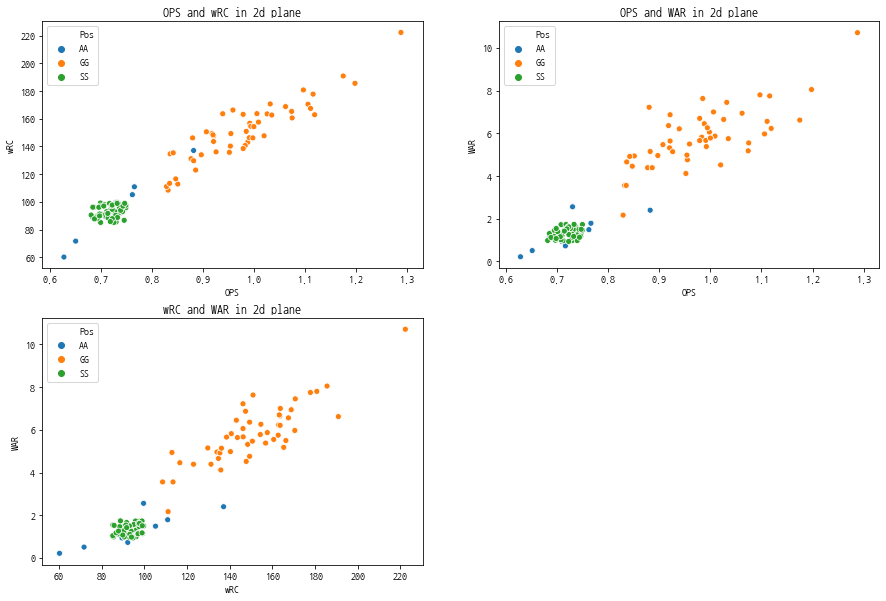

In [4]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='OPS', y='wRC', data=df, hue='Pos')
plt.title('OPS and wRC in 2d plane')
plt.subplot(2, 2, 2)
sns.scatterplot(x='OPS', y='WAR', data=df, hue='Pos')
plt.title('OPS and WAR in 2d plane')
plt.subplot(2, 2, 3)
sns.scatterplot(x='wRC', y='WAR', data=df, hue='Pos')
plt.title('wRC and WAR in 2d plane')

In [5]:
df_OPS = df.drop(['RNG', 'RAA', 'WAA'], axis=1)
df_OPS
# RNG 1.00 이하 RAA 2.5 이하 OPS 0.750 이하

,Player,Pos,OPS,wRC,WAR
0,심우준,AA,0.729000,88.400000,1.090000
1,오지환,AA,0.684000,89.000000,1.080000
2,김지찬,AA,0.628000,60.200000,0.220000
3,박성한,AA,0.709000,89.500000,0.940000
4,김혜성,AA,0.730000,99.600000,2.560000
...,...,...,...,...,...
105,표본,SS,0.697827,89.854012,1.073561
106,표본,SS,0.746960,98.989586,1.507807
107,표본,SS,0.718904,85.799995,1.525801
108,표본,SS,0.713926,91.685318,1.421083


In [6]:
from sklearn.model_selection import train_test_split
train, test = df_OPS[10:], df_OPS[:10]
# train, test = train_test_split(df_OPS, test_size=0.2)
print(train.shape[0])
print(test.shape[0])

100
10


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
find_k = []
for i in range(3, train.shape[0] // 2, 2):
    find_k.append(i)
print(find_k)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [9]:
cross_validation_scores = []
x_train = train[['OPS', 'wRC', 'WAR']]
y_train = train['Pos']
print(y_train)

10     GG
11     GG
12     GG
13     GG
14     GG
       ..
105    SS
106    SS
107    SS
108    SS
109    SS
Name: Pos, Length: 100, dtype: object


In [10]:
for k in find_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), scoring='accuracy', cv=4)
    cross_validation_scores.append(scores.mean())
print(cross_validation_scores)

[1.0, 0.99, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94]


Text(0, 0.5, 'accuray')

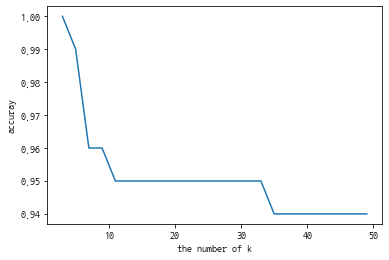

In [11]:
plt.plot(find_k, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('accuray')

In [12]:
optimal_k = find_k[cross_validation_scores.index(max(cross_validation_scores))]
print('최적의 k: {}'.format(optimal_k))

최적의 k: 3


In [13]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
x_train = train[['OPS', 'wRC', 'WAR']]
y_train = train['Pos']
knn.fit(x_train, y_train.values.ravel())

# 테스트에 사용할 속성과 포지션에 대한 정답을 지정한다.
x_test = df_OPS[:10][['OPS', 'wRC', 'WAR']]
y_test = df_OPS[:10]['Pos']

from sklearn.metrics import accuracy_score

predict = knn.predict(x_test)
print('정확도: {}'.format(accuracy_score(y_test.values.ravel(), predict)))

정확도: 0.0


In [14]:
comparison = pd.DataFrame({'예측값': predict, '실제값': y_test.values.ravel()})
comparison

,예측값,실제값
0,SS,AA
1,SS,AA
2,SS,AA
3,SS,AA
4,SS,AA
5,GG,AA
6,GG,AA
7,SS,AA
8,GG,AA
9,SS,AA


In [15]:
x_test

,OPS,wRC,WAR
0,0.729,88.4,1.09
1,0.684,89.0,1.08
2,0.628,60.2,0.22
3,0.709,89.5,0.94
4,0.730,99.6,2.56
5,0.766,110.9,1.79
6,0.762,105.2,1.49
7,0.651,71.7,0.51
8,0.882,137.1,2.40
9,0.716,92.2,0.73


In [16]:
df.head(10)

,Player,Pos,RNG,RAA,WAA,OPS,wRC,WAR
0,심우준,AA,0.63,3.55,0.345,0.729,88.4,1.09
1,오지환,AA,7.69,11.09,1.088,0.684,89.0,1.08
2,김지찬,AA,-1.13,-0.32,-0.031,0.628,60.2,0.22
3,박성한,AA,-3.90,-2.72,-0.262,0.709,89.5,0.94
4,김혜성,AA,2.29,4.66,0.449,0.730,99.6,2.56
5,하주석,AA,2.96,6.37,0.617,0.766,110.9,1.79
6,마차도,AA,3.57,6.75,0.656,0.762,105.2,1.49
7,박찬호,AA,-3.82,-0.45,-0.044,0.651,71.7,0.51
8,노진혁,AA,0.00,3.18,0.305,0.882,137.1,2.40
9,안재석,AA,-0.36,1.07,0.103,0.716,92.2,0.73


In [17]:
train_, test_ = df[10:], df[:10]
# train, test = train_test_split(df, test_size=0.2)
print(train_.shape[0])
print(test_.shape[0])

100
10


In [18]:
find_k_ = []
for i in range(3, train_.shape[0] // 2, 2):
    find_k_.append(i)
print(find_k_)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [19]:
cross_validation_scores = []
x_train_ = train_[['RNG', 'RAA', 'WAA', 'OPS', 'wRC', 'WAR']]
y_train_ = train_['Pos']
print(x_train_)

          RNG        RAA       WAA       OPS         wRC       WAR
10   2.260000   5.830000  0.538000  0.921000  147.400000  6.870000
11  -5.320000  -1.310000 -0.131000  0.880000  146.200000  7.220000
12   7.820000  14.820000  1.327000  0.832000  108.500000  3.560000
13   0.030000   6.620000  0.602000  0.897000  134.000000  4.960000
14   7.730000  19.240000  1.713000  0.829000  111.100000  2.170000
..        ...        ...       ...       ...         ...       ...
105  1.373391   4.650572  0.323807  0.697827   89.854012  1.073561
106  0.231298   3.389571  0.616854  0.746960   98.989586  1.507807
107  0.538265   3.009092  0.406720  0.718904   85.799995  1.525801
108  2.895079   3.901517  0.324107  0.713926   91.685318  1.421083
109  1.177666   4.515093  0.470375  0.732253   98.917061  1.175208

[100 rows x 6 columns]


In [20]:
for k in find_k_:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    scores_ = cross_val_score(knn_, x_train_, y_train_.values.ravel(), scoring='accuracy', cv=4)
    cross_validation_scores.append(scores_.mean())
print(cross_validation_scores)

[0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94]


Text(0, 0.5, 'accuray')

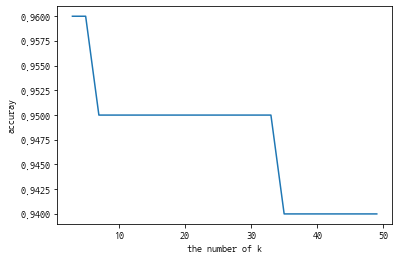

In [21]:
plt.plot(find_k_, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('accuray')

In [22]:
optimal_k_ = find_k_[cross_validation_scores.index(max(cross_validation_scores))]
print('최적의 k: {}'.format(optimal_k_))

최적의 k: 3


In [23]:
knn_ = KNeighborsClassifier(n_neighbors=optimal_k_)
x_train_ = train_[['RNG', 'RAA', 'WAA', 'OPS', 'wRC', 'WAR']]
y_train_ = train_['Pos']
knn_.fit(x_train_, y_train_.values.ravel())

# 테스트에 사용할 속성과 포지션에 대한 정답을 지정한다.
x_test_ = df[:10][['RNG', 'RAA', 'WAA', 'OPS', 'wRC', 'WAR']]
y_test_ = df[:10]['Pos']

from sklearn.metrics import accuracy_score

predict_ = knn_.predict(x_test_)
print('정확도: {}'.format(accuracy_score(y_test_.values.ravel(), predict_)))

정확도: 0.0


In [24]:
comparison = pd.DataFrame({'예측값': predict_, '실제값': y_test_.values.ravel()})
comparison

,예측값,실제값
0,SS,AA
1,SS,AA
2,SS,AA
3,SS,AA
4,SS,AA
5,GG,AA
6,SS,AA
7,SS,AA
8,GG,AA
9,SS,AA


In [25]:
df.head(10)

,Player,Pos,RNG,RAA,WAA,OPS,wRC,WAR
0,심우준,AA,0.63,3.55,0.345,0.729,88.4,1.09
1,오지환,AA,7.69,11.09,1.088,0.684,89.0,1.08
2,김지찬,AA,-1.13,-0.32,-0.031,0.628,60.2,0.22
3,박성한,AA,-3.90,-2.72,-0.262,0.709,89.5,0.94
4,김혜성,AA,2.29,4.66,0.449,0.730,99.6,2.56
5,하주석,AA,2.96,6.37,0.617,0.766,110.9,1.79
6,마차도,AA,3.57,6.75,0.656,0.762,105.2,1.49
7,박찬호,AA,-3.82,-0.45,-0.044,0.651,71.7,0.51
8,노진혁,AA,0.00,3.18,0.305,0.882,137.1,2.40
9,안재석,AA,-0.36,1.07,0.103,0.716,92.2,0.73


결론: 골든글러브는 수비 수치와는 거의 무관하게 타격 성적으로 결정이 되며 현재 하주석 마차도 노진혁이 유력하다.  
      만약 수비 수치를 포함한다고 하면 상당히 이상한 결과가 나오며 주로 타격에 의존하여 골든글러브가 결정됨을 알 수 있다.